###########################################

Data exploration

###########################################

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_prep/pacers_data/final_shots.csv")
df.shape

(14403, 33)

In [3]:
df.columns

Index(['SHOT_VALUE', 'ACTION_ID', 'SCORE_DIFF', 'CLUTCH_FLAG', 'GAME_ID',
       'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'EVENT_TYPE',
       'ACTION_TYPE', 'SHOT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA',
       'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 'SHOT_MADE_FLAG',
       'ZONE_FG_PCT', 'FGA_FREQUENCY', 'FGM', 'FGA', 'FG_PCT', 'EFG_PCT',
       'FG2A_FREQUENCY', 'FG2M', 'FG2A', 'FG2_PCT', 'FG3A_FREQUENCY', 'FG3M',
       'FG3A', 'FG3_PCT'],
      dtype='object')

In [6]:
df["GAME_ID"].unique()[:10]

array([22401172, 22400217, 22400170, 22401168, 22401148, 22401142,
       22401119, 22401104, 22401090, 22401079])

Plot shot locations from single game.

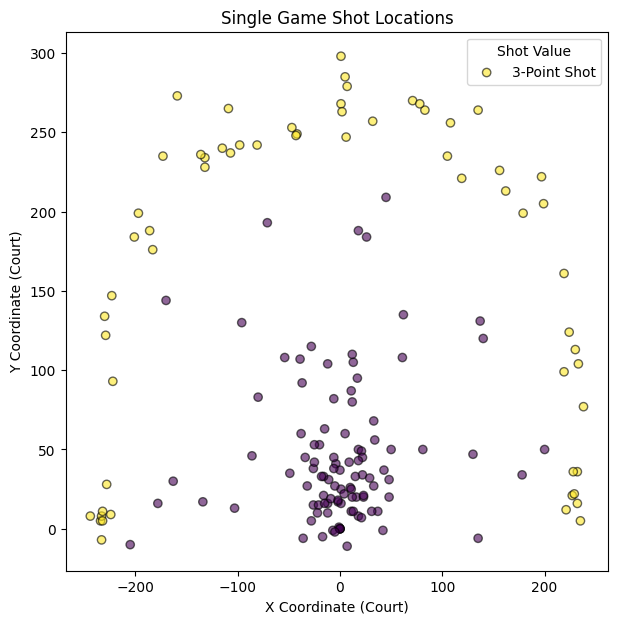

In [18]:
import matplotlib.pyplot as plt

view_df = df[df["GAME_ID"] == 22401172]

# Create the scatter plot
plt.figure(figsize=(7, 7))  # Set figure size
plt.scatter(view_df['LOC_X'], view_df['LOC_Y'], c=view_df["SHOT_VALUE"], alpha=0.6, edgecolors='black')

# Labels and title
plt.xlabel("X Coordinate (Court)")
plt.ylabel("Y Coordinate (Court)")
plt.title("Single Game Shot Locations")
plt.legend(title="Shot Value", loc='upper right', labels=["3-Point Shot", "2-Point Shot"])

# Display the plot
plt.show()

Value counts of target variable.

In [19]:
df["SHOT_MADE_FLAG"].value_counts()

0    7463
1    6940
Name: SHOT_MADE_FLAG, dtype: int64

In [20]:
df["EVENT_TYPE"].unique()

array(['Missed Shot', 'Made Shot'], dtype=object)

In [27]:
df["ACTION_TYPE"].isna().sum()

0

In [26]:
df["ACTION_TYPE"].unique()

array(['Jump Shot', 'Driving Finger Roll Layup Shot',
       'Alley Oop Dunk Shot', 'Hook Shot', 'Driving Hook Shot',
       'Cutting Dunk Shot', 'Alley Oop Layup shot', 'Tip Layup Shot',
       'Cutting Layup Shot', 'Dunk Shot', 'Running Alley Oop Dunk Shot',
       'Layup Shot', 'Putback Layup Shot',
       'Driving Floating Bank Jump Shot', 'Driving Layup Shot',
       'Driving Floating Jump Shot', 'Running Reverse Dunk Shot',
       'Running Layup Shot', 'Running Dunk Shot',
       'Running Pull-Up Jump Shot', 'Driving Dunk Shot',
       'Pullup Jump shot', 'Reverse Layup Shot', 'Fadeaway Jump Shot',
       'Step Back Jump shot', 'Running Jump Shot',
       'Driving Reverse Layup Shot', 'Cutting Finger Roll Layup Shot',
       'Turnaround Jump Shot', 'Running Reverse Layup Shot',
       'Turnaround Fadeaway shot', 'Turnaround Bank Hook Shot',
       'Floating Jump shot', 'Tip Dunk Shot',
       'Running Finger Roll Layup Shot', 'Running Alley Oop Layup Shot',
       'Turnaround Ban

###########################################

Preprocessing and Modeling

###########################################

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [ ]:
# Data loading
filename = 'final_data_spurs.csv'
df = pd.read_csv(filename)

print("=== DATA OVERVIEW ===") 
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}") 
print("\nColumn names:") 
print(df.columns.tolist())
print("\nFirst 5 rows:") 
print(df.head(5))

=== DATA OVERVIEW ===
Rows: 14403, Columns: 33

Column names:
['SHOT_VALUE', 'ACTION_ID', 'SCORE_DIFF', 'CLUTCH_FLAG', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 'SHOT_MADE_FLAG', 'ZONE_FG_PCT', 'FGA_FREQUENCY', 'FGM', 'FGA', 'FG_PCT', 'EFG_PCT', 'FG2A_FREQUENCY', 'FG2M', 'FG2A', 'FG2_PCT', 'FG3A_FREQUENCY', 'FG3M', 'FG3A', 'FG3_PCT']

First 5 rows:
   SHOT_VALUE  ACTION_ID  SCORE_DIFF  CLUTCH_FLAG   GAME_ID  GAME_EVENT_ID  \
0           3          3         0.0            0  22401172              7   
1           2         20        -1.0            0  22401172             27   
2           2          5         0.0            0  22401172              9   
3           3         14         0.0            0  22401172             19   
4           2         46         2.0            0  22401172             63   

   PLAYER_ID   PLAYER_

In [29]:
# Target variable and features
num_features = ['SHOT_VALUE', 'SCORE_DIFF', 'CLUTCH_FLAG', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 'FG_PCT', 'EFG_PCT', 'PLAYER_SHOT_PCT']
cat_features = ['ACTION_TYPE']
X = df[num_features + cat_features]
y = df['SHOT_MADE_FLAG']

In [31]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ct = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OrdinalEncoder(), cat_features)
    ]
)

X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

In [16]:
X_train_transformed

array([[ 1.21413548, -0.41469775, -0.18816531, ..., -0.16879796,
         0.82883836, 22.        ],
       [-0.82363131,  0.15751264, -0.18816531, ...,  0.2412223 ,
         0.57801427,  7.        ],
       [ 1.21413548,  0.15751264, -0.18816531, ...,  1.9633074 ,
        -0.48798811, 22.        ],
       ...,
       [-0.82363131,  0.06214424, -0.18816531, ...,  0.19201987,
        -1.71075554, 18.        ],
       [ 1.21413548, -1.74985533, -0.18816531, ...,  0.12641663,
         0.68774981, 33.        ],
       [-0.82363131,  0.06214424, -0.18816531, ...,  0.19201987,
         0.53098476, 18.        ]])

In [32]:
# Models and hyperparameter tuning
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [1000],
    'random_state': [42]
}

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'random_state': [42]
}

lr = LogisticRegression()
rf = RandomForestClassifier()

lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)

lr_grid.fit(X_train_transformed, y_train)
rf_grid.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200], 'random_state': [42]},
             scoring='accuracy')

###########################################

Evaluation

###########################################

In [34]:
# Accuracy
lr_best = lr_grid.best_estimator_
rf_best = rf_grid.best_estimator_

lr_pred = lr_best.predict(X_test_transformed)
rf_pred = rf_best.predict(X_test_transformed)

lr_accuracy = accuracy_score(y_test, lr_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Logistic Regression Test Accuracy:", lr_accuracy)
print("Random Forest Test Accuracy:", rf_accuracy)
print("\nBest Model:", "Random Forest" if rf_accuracy > lr_accuracy else "Logistic Regression")

Logistic Regression Test Accuracy: 0.6095105866018744
Random Forest Test Accuracy: 0.613328705310656

Best Model: Random Forest
